In [1]:
import numpy as np
import os
import ast

%matplotlib inline
import matplotlib.pyplot as plt

import pickle
from openfermion.ops import QubitOperator

In [2]:
working_dir = os.path.dirname(os.getcwd()) # gets directory where running python file is!
data_dir = os.path.join(working_dir,'ContextualSubspaceVQE')
hamiltonian_data = os.path.join(data_dir, 'hamiltonians.txt')


with open(hamiltonian_data, 'r') as input_file:
    hamiltonians = ast.literal_eval(input_file.read())
    
    
full_H_size = {mol_key: len(hamiltonians[mol_key][2]) for mol_key in hamiltonians}

In [3]:
for key in full_H_size.keys():
    print(f"{key: <25}     No. terms:  {full_H_size[key]:<5.0f}")

H2-S1_STO-3G_singlet          No. terms:  6237 
C1-O1_STO-3G_singlet          No. terms:  4409 
H1-Cl1_STO-3G_singlet         No. terms:  4409 
H1-Na1_STO-3G_singlet         No. terms:  4409 
H2-Mg1_STO-3G_singlet         No. terms:  3540 
H1-F1_3-21G_singlet           No. terms:  6852 
H1-Li1_3-21G_singlet          No. terms:  6852 
Be1_STO-3G_singlet            No. terms:  102  
H1-F1_STO-3G_singlet          No. terms:  558  
H1-Li1_STO-3G_singlet         No. terms:  558  
Ar1_STO-3G_singlet            No. terms:  1465 
F2_STO-3G_singlet             No. terms:  2229 
H1-O1_STO-3G_singlet          No. terms:  558  
H2-Be1_STO-3G_singlet         No. terms:  596  
H2-O1_STO-3G_singlet          No. terms:  1035 
H2_3-21G_singlet              No. terms:  122  
H2_6-31G_singlet              No. terms:  122  
H3-N1_STO-3G_singlet          No. terms:  3048 
H4-C1_STO-3G_singlet          No. terms:  2194 
Mg1_STO-3G_singlet            No. terms:  1465 
N2_STO-3G_singlet             No. terms:

In [5]:
## import results
file_name = 'experimental_ordering_anticommuting_vs_standard_conH__2021Mar11-021339950077.pickle'

with open(file_name, 'rb') as infile:
    loaded_dict = pickle.load(infile)
    

In [6]:
for key in loaded_dict:
    print(key)

H3_STO-3G_singlet_1+
Be1_STO-3G_singlet
H2_3-21G_singlet
H2_6-31G_singlet
H1-He1_3-21G_singlet_1+
H1-F1_STO-3G_singlet
H1-Li1_STO-3G_singlet
H1-O1_STO-3G_singlet
H2-Be1_STO-3G_singlet
H3_3-21G_singlet_1+
H2-O1_STO-3G_singlet
H3-N1_STO-3G_singlet
Mg1_STO-3G_singlet
H4-C1_STO-3G_singlet
H4-N1_STO-3G_singlet_1+
F2_STO-3G_singlet
N2_STO-3G_singlet
O2_STO-3G_singlet
C1-O1_STO-3G_singlet
H1-Cl1_STO-3G_singlet
H1-Na1_STO-3G_singlet
H2-Mg1_STO-3G_singlet
H1-F1_3-21G_singlet
H1-Li1_3-21G_singlet
H1-Li1-O1_STO-3G_singlet
H2-S1_STO-3G_singlet


In [7]:
def plot_CS_VQE_vs_UP(mol_dict, mol_name, dpi=100):
    
    ## get total number of terms for each reduction
    UP_total_terms = []
    CS_VQE_terms =[]
    for CS_VQE_Ham, UP_ham in mol_dict:
        UP_total_terms.append(len(UP_ham))
        CS_VQE_terms.append(len(CS_VQE_Ham))
    
    plt.figure(dpi=dpi)
    plt.plot(CS_VQE_terms, UP_total_terms, marker='o', color='b');
    plt.xlabel('number of CS VQE terms')
    plt.ylabel('number of UP terms')
    plt.title(mol_name)
    
    plt.show()
    


# Plot of CS_VQE vs CS_VQE + unitary partitioning

- Below are plots of the number of terms in each **CS VQE molecular hamiltion vs number of terms in the SAME hamiltonian with unitary partitioning applied**.

- From left to right on the x axis the quantum resource has been expanded (more qubits used), till the rightmost point where no simplification has been made (aka Hamiltonian hasn't had terms removed)

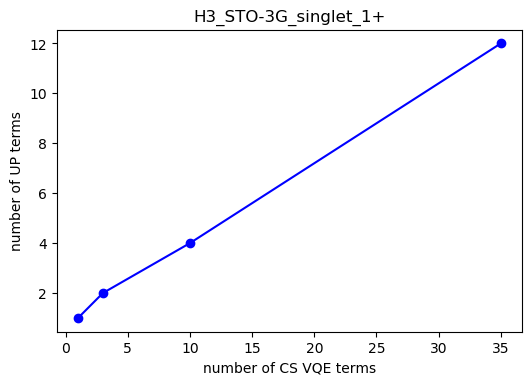

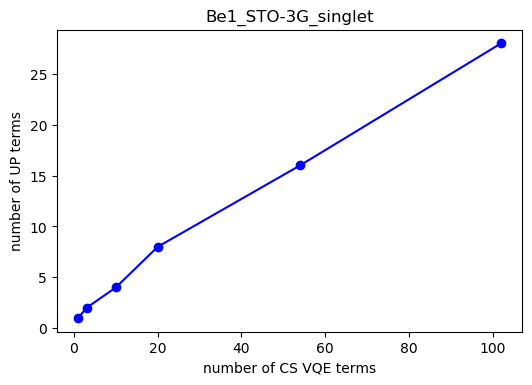

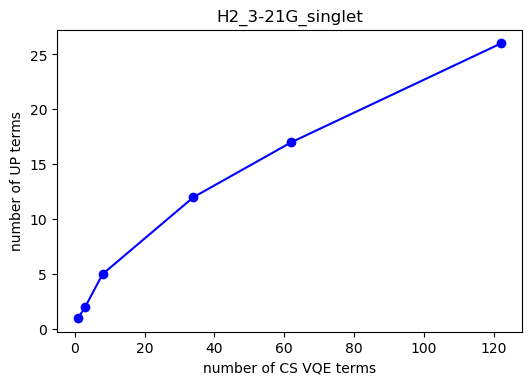

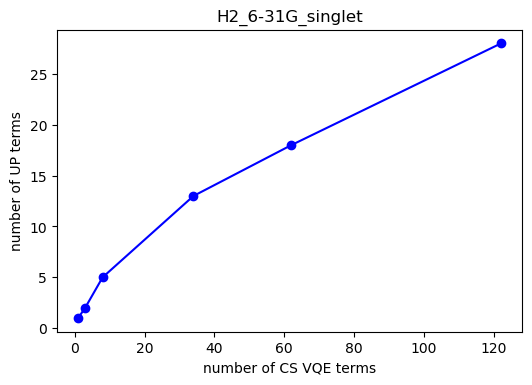

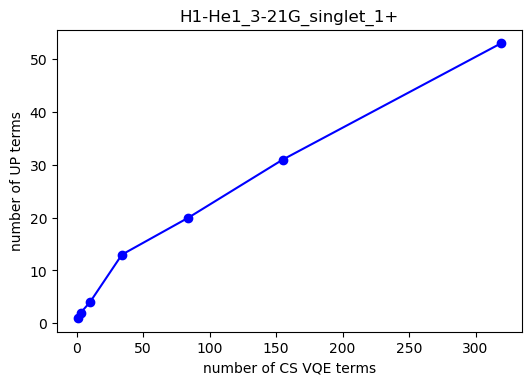

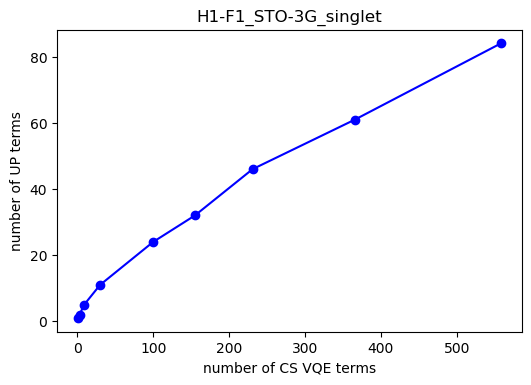

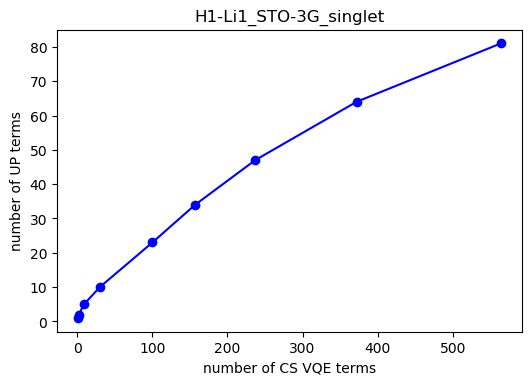

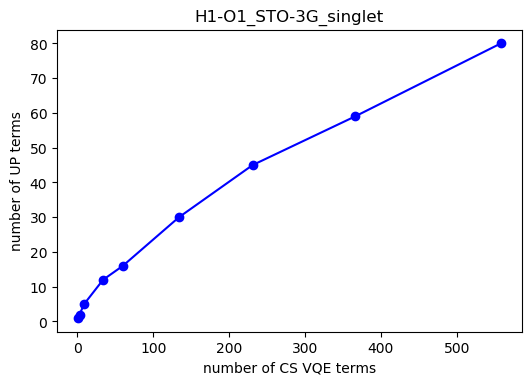

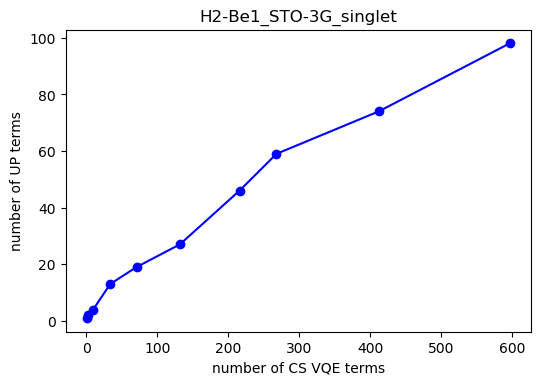

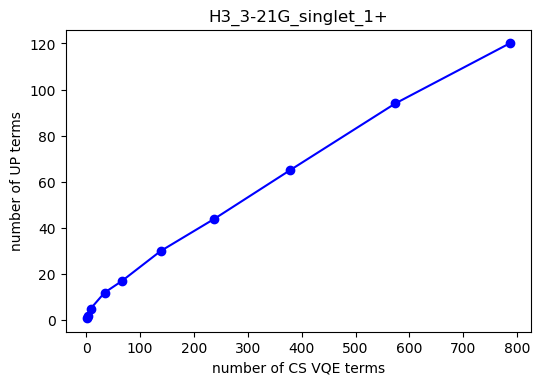

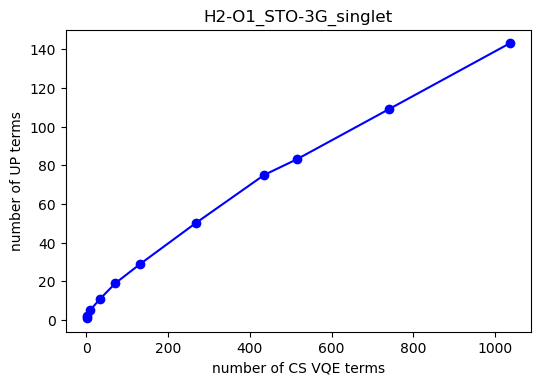

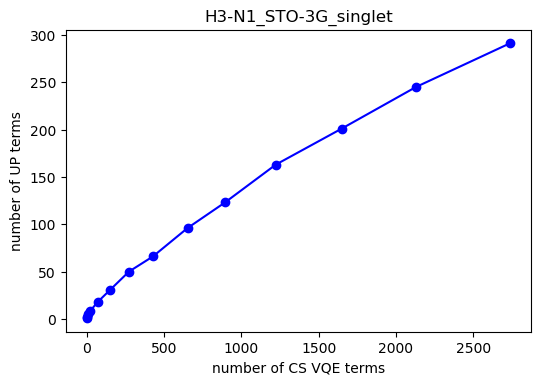

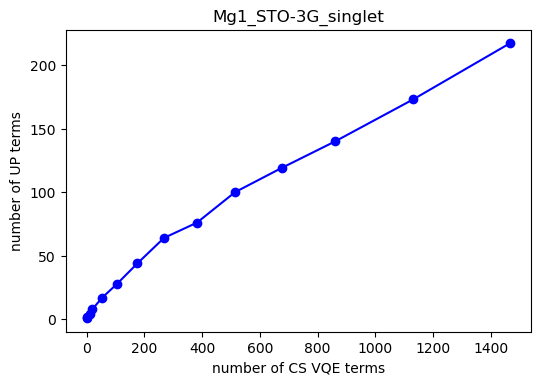

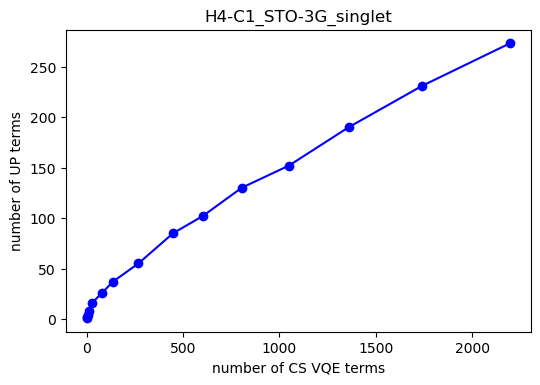

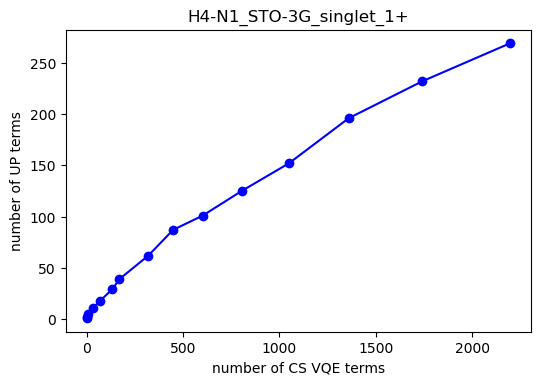

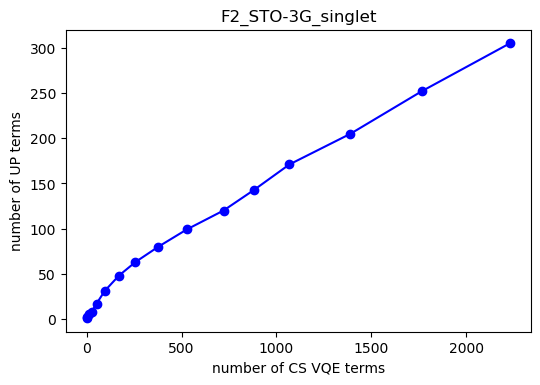

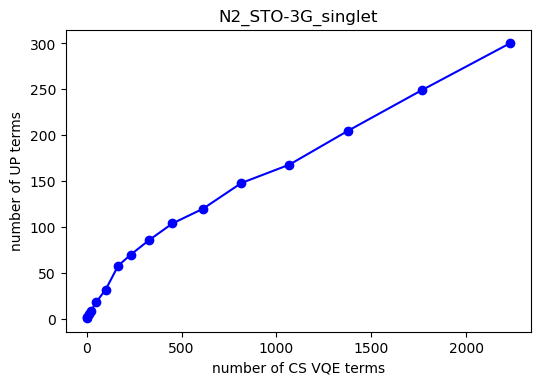

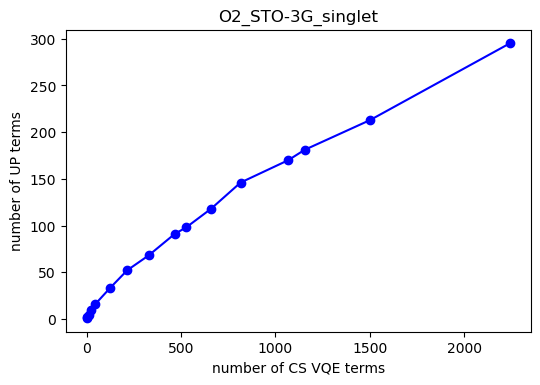

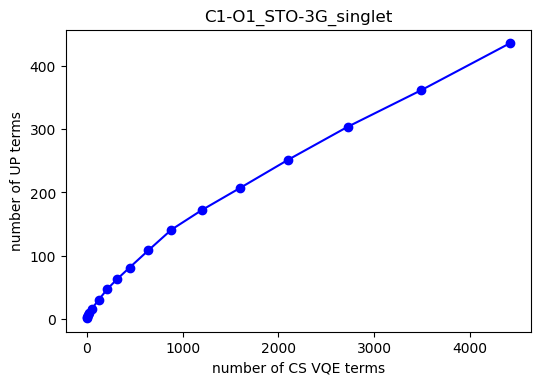

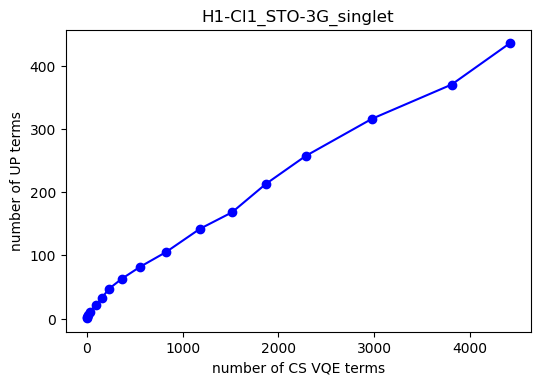

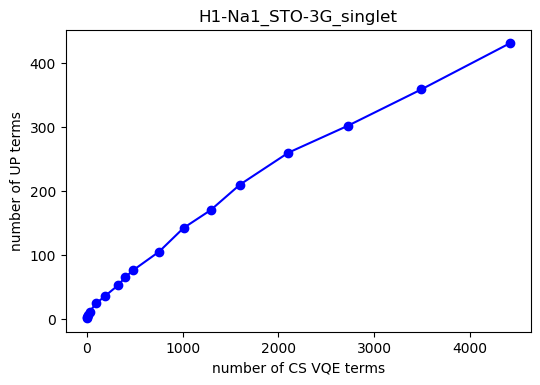

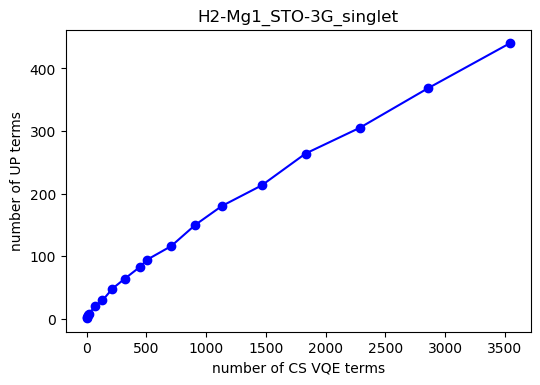

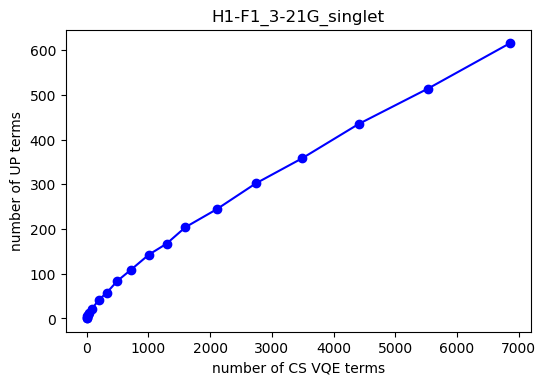

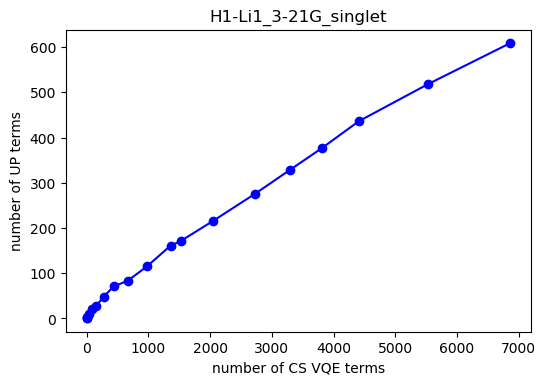

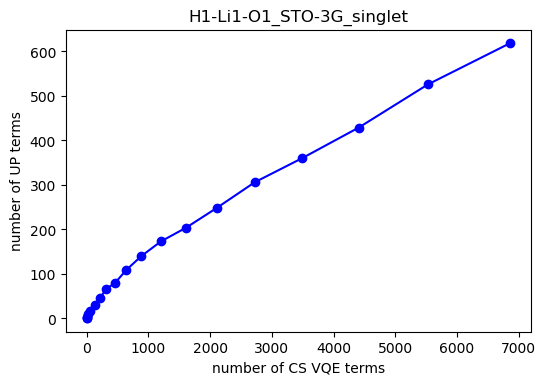

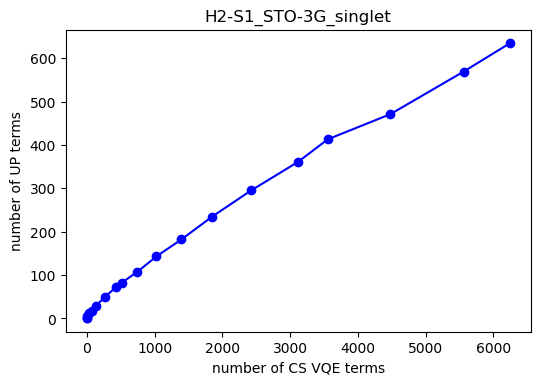

In [8]:
for molecule in loaded_dict:
    plot_CS_VQE_vs_UP(loaded_dict[molecule], molecule)

In [9]:
def plot_n_qubits_VS_n_terms(mol_dict, mol_name, dpi=200):
    # https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
    
    ## get total number of terms for each reduction
    UP_total_terms = []
    CS_VQE_terms =[]
    for CS_VQE_Ham, UP_ham in mol_dict:
        UP_total_terms.append(len(UP_ham))
        CS_VQE_terms.append(len(CS_VQE_Ham))
    
   
    
    n_qubits = np.array([i for i in range(len(mol_dict))]) # labels

    width = 0.5  # the width of the bars

    fig, ax = plt.subplots(dpi=dpi)
    rects1 = ax.bar(n_qubits - width/2, CS_VQE_terms, width, label='CS_VQE')
    rects2 = ax.bar(n_qubits + width/2, UP_total_terms, width, label='UP')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number of terms')
    ax.set_xlabel('Number of qubits')
    
    ax.set_title(mol_name)
    ax.set_xticks(n_qubits)
    ax.set_xticklabels(n_qubits)
    ax.legend()


#     def autolabel(rects):
#         """Attach a text label above each bar in *rects*, displaying its height."""
#         for rect in rects:
#             height = rect.get_height()
#             ax.annotate('{}'.format(height),
#                         xy=(rect.get_x() + rect.get_width() / 2, height),
#                         xytext=(0, 3),  # 3 points vertical offset
#                         textcoords="offset points",
#                         ha='center', va='bottom')


#     autolabel(rects1)
#     autolabel(rects2)

    fig.tight_layout()

    plt.show()

# Plot of CS_VQE and CS_VQE + unitary partitioning against quantum resource

- Below are plots of the number of terms in each **CS VQE molecular hamiltion vs number of qubits AND the same Hamiltonian with unitary partitioning applied vs number of qubits**


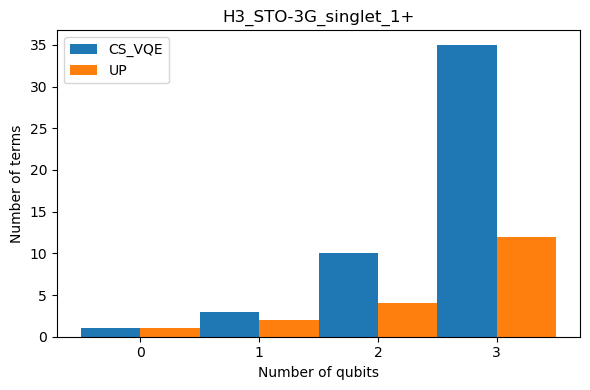

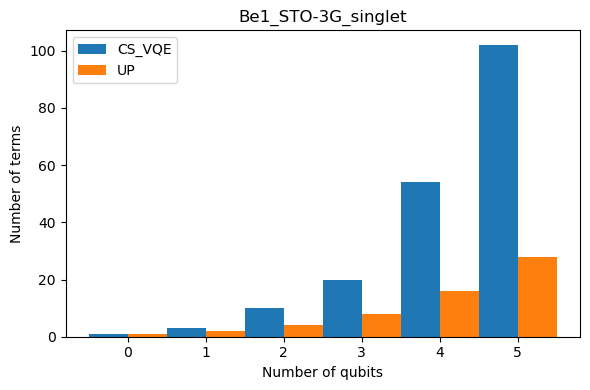

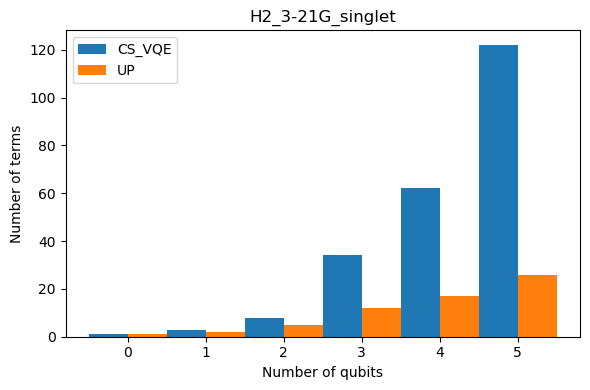

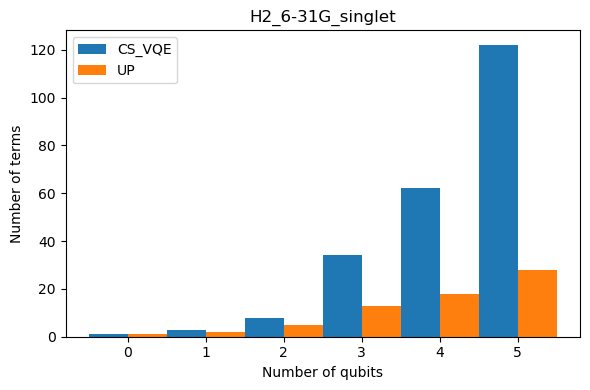

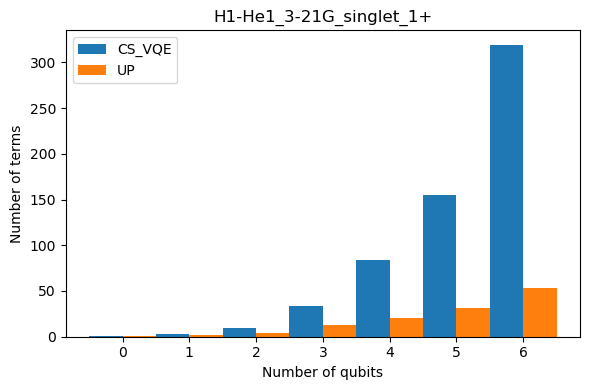

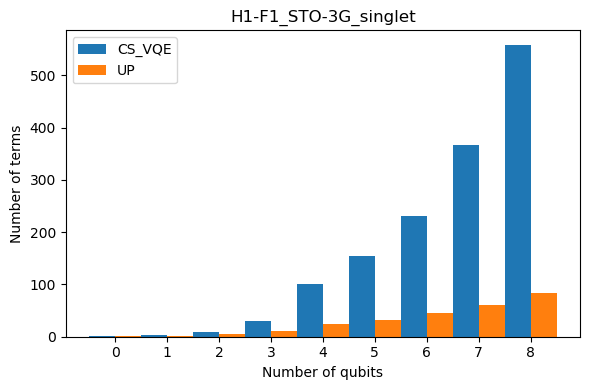

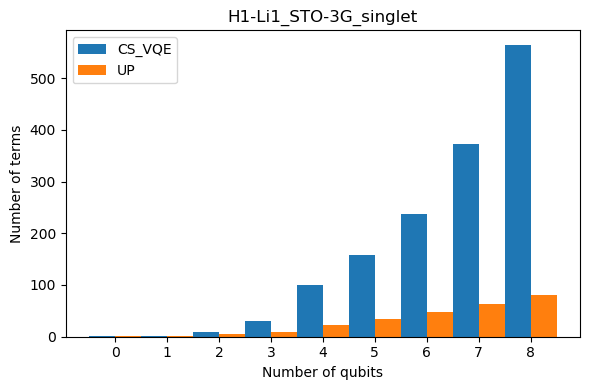

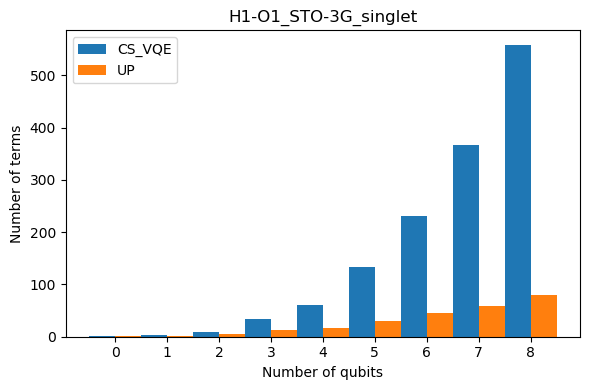

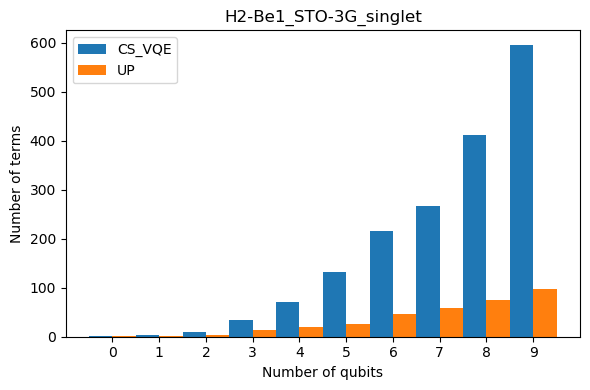

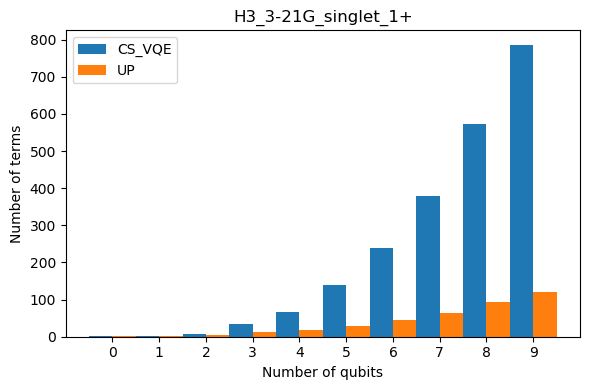

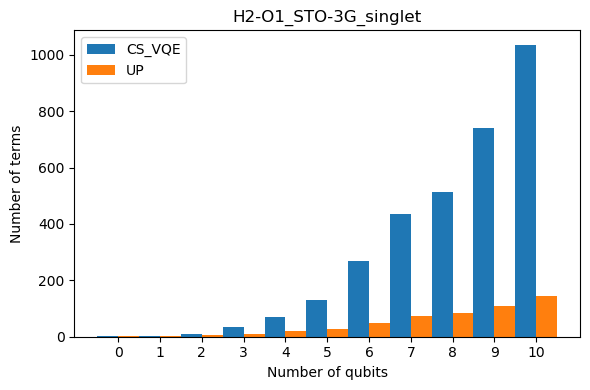

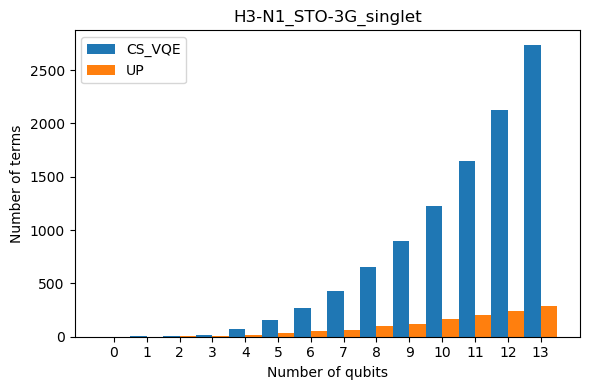

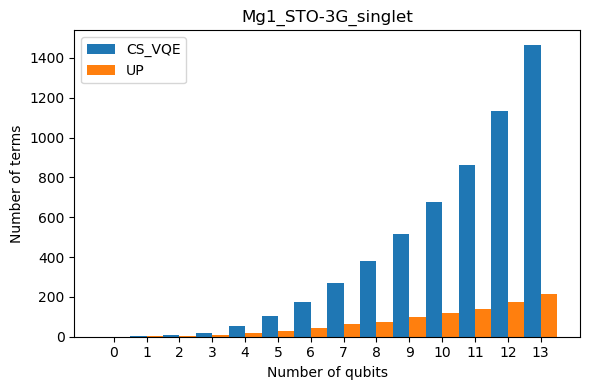

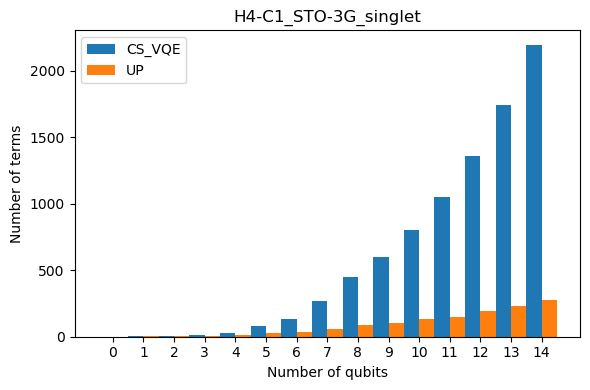

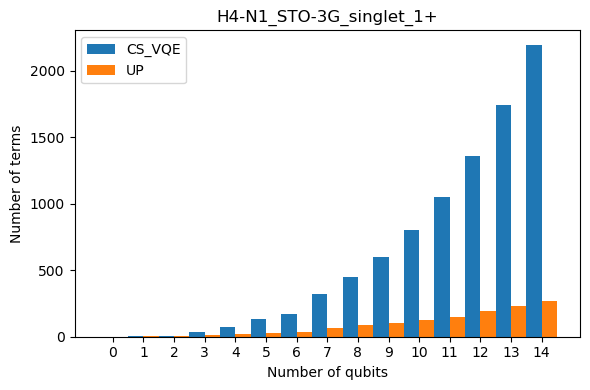

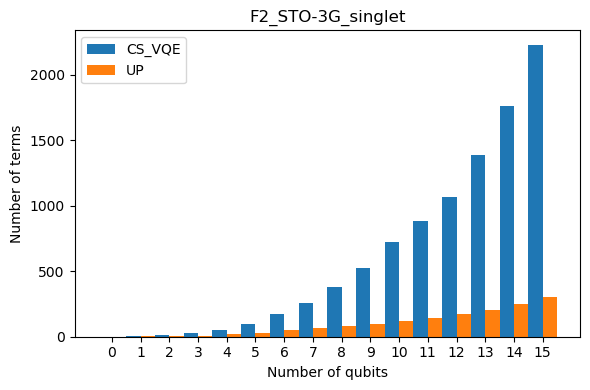

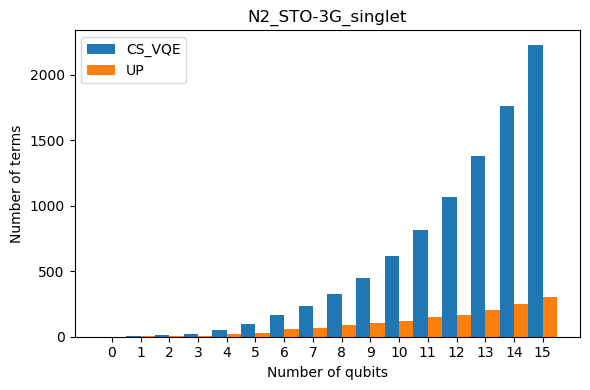

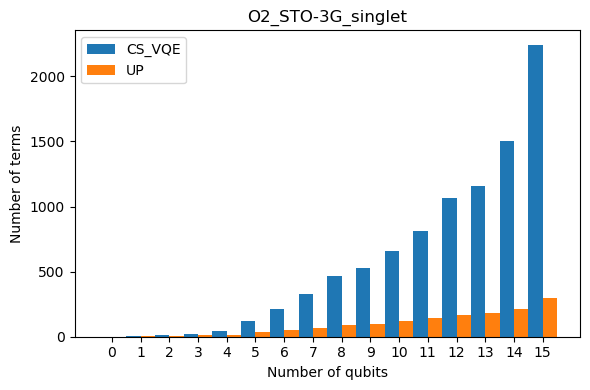

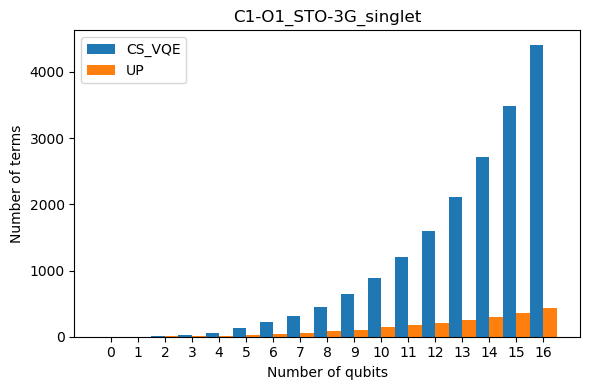

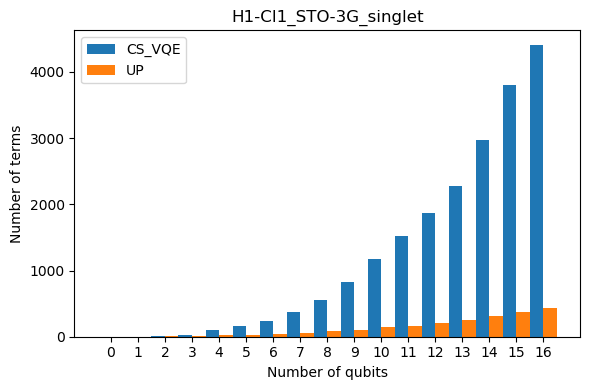

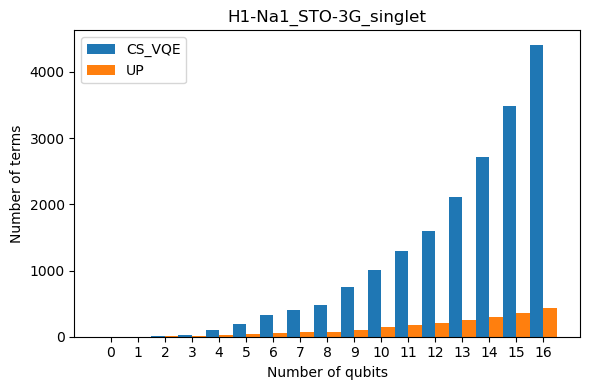

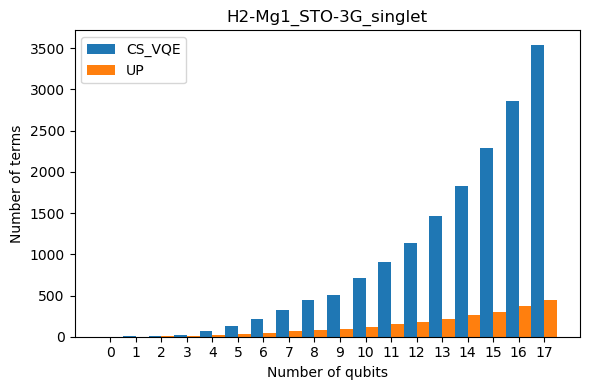

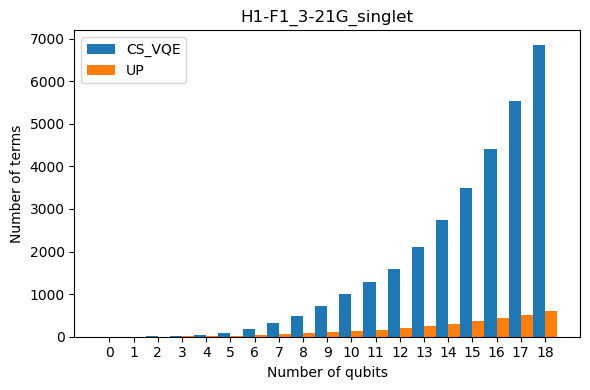

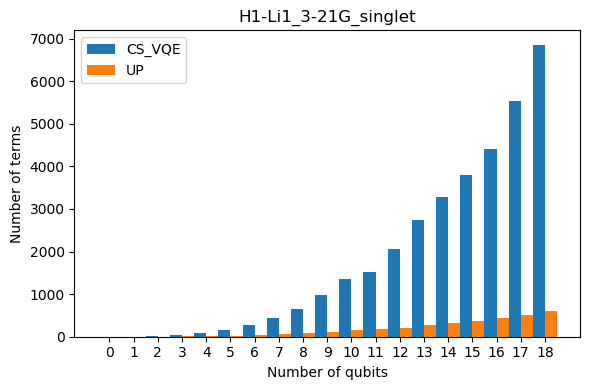

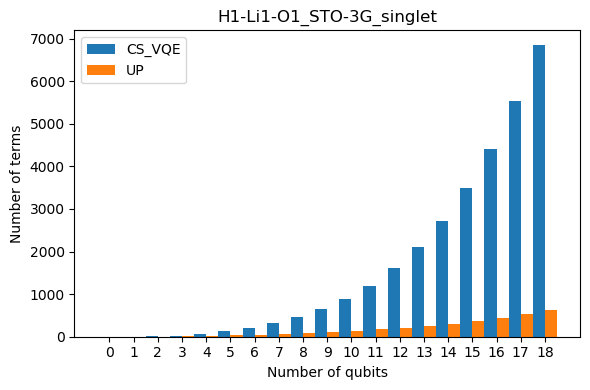

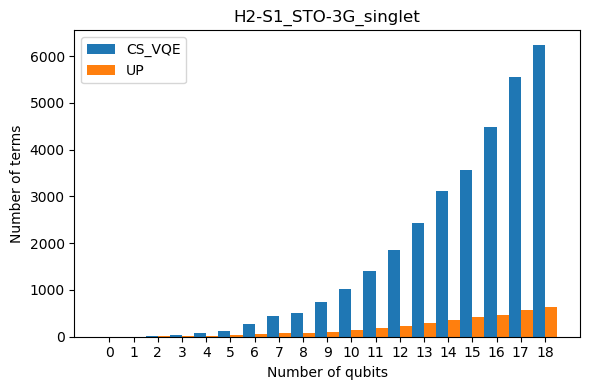

In [10]:
for molecule in loaded_dict:
    plot_n_qubits_VS_n_terms(loaded_dict[molecule], molecule, dpi=100)

# Chemical accuracy check

In [11]:
### paper results
csvqe_results_data = os.path.join(data_dir, 'csvqe_results.txt')
with open(csvqe_results_data, 'r') as input_file:
    csvqe_results = ast.literal_eval(input_file.read())


In [12]:
## import LCU results
file_name = 'E_LCU_all_EXP__2021Mar11-021339950077.pickle'

with open(file_name, 'rb') as infile:
    E_LCU_dict = pickle.load(infile)
    

In [13]:
def plot_n_terms_and_error(mol_dict, paper_results_dict, Nterms_H_dict, mol_name, LCU_energies_dict, dpi=200):
    # https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
    
    # mol_dict = list of lists of anticommuting sets and standard contextual H
    # paper_results_dict =  CS-VQE paper results dict
    # Nterms_H_dict = dict of number of terms in each molecular hamiltonian without any method applied!
    
    ## get total number of terms for each reduction
    UP_total_terms = []
    CS_VQE_terms =[]
    for CS_VQE_Ham, UP_ham in mol_dict:
        UP_total_terms.append(len(UP_ham))
        CS_VQE_terms.append(len(CS_VQE_Ham))
    
    
    n_qubits = np.array([i for i in range(len(mol_dict))]) # labels

    width = 0.5  # the width of the bars

    fig, ax = plt.subplots(dpi=dpi)
    rects1 = ax.bar(n_qubits - width/2, CS_VQE_terms, width, label='CS_VQE')
    rects2 = ax.bar(n_qubits + width/2, UP_total_terms, width, label='UP')

    ax.set_ylabel('Number of terms')
    ax.set_xlabel('Number of qubits')
    

    original_N_terms = Nterms_H_dict[mol_name]
    rects3 = ax.bar(n_qubits[-1] + width*1.5, original_N_terms, width, label='original H')
    

    ####  second y axis!
    true_gs_energy = paper_results_dict[mol_name][0]
    CS_VQE_error = paper_results_dict[mol_name][2]
    LCU_errors = LCU_energies_dict[mol_name]['Error_list']
    
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(n_qubits,CS_VQE_error,color="blue",marker="o", label='CS_VQE error')
    ax2.plot(n_qubits,LCU_errors,color="red",marker="x", linestyle='--', label='CS_VQE + LCU_UP error')
    ax2.set_ylabel("Energy Error",color="black",fontsize=14)

    ax2.axhline(y=1.6e-3, color='black', linestyle='-', label='chemical accuracy')
    
    ax.set_title(mol_name)
    ax.set_xticks(n_qubits)
    ax.set_xticklabels(n_qubits)
    ax.legend()
    ax2.legend(loc='center left')
    fig.tight_layout()

    plt.show()
    
        # save the plot as a file
#     fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#                 format='jpeg',
#                 dpi=100,
#                 bbox_inches='tight')

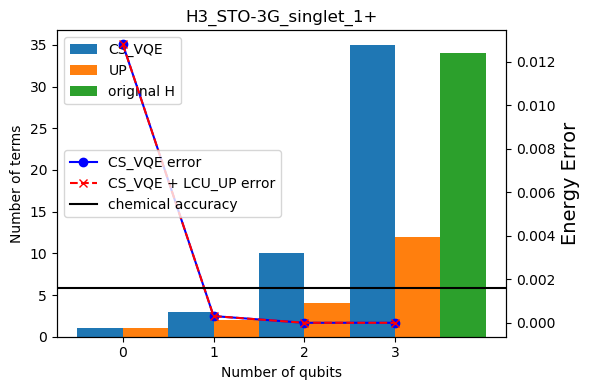

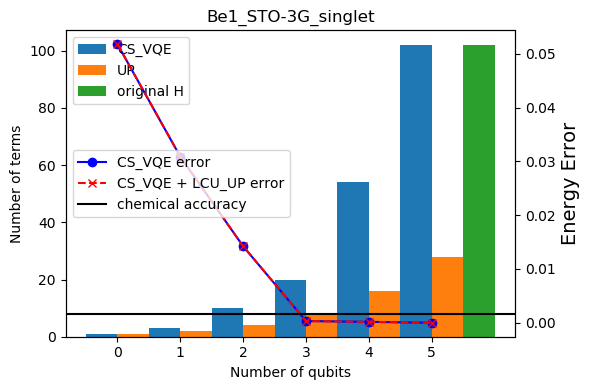

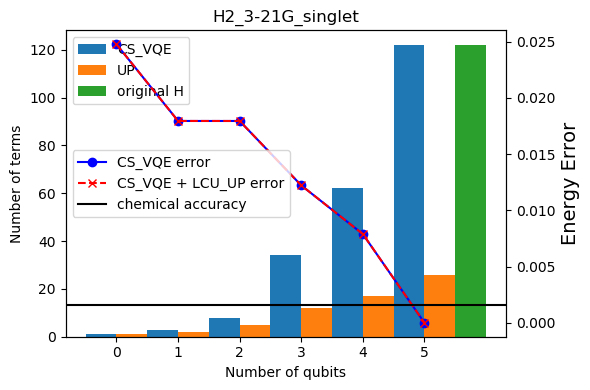

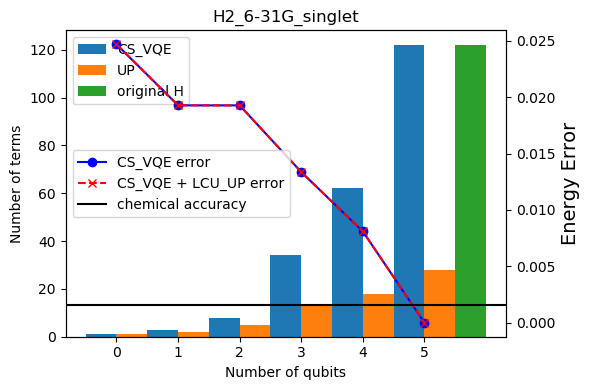

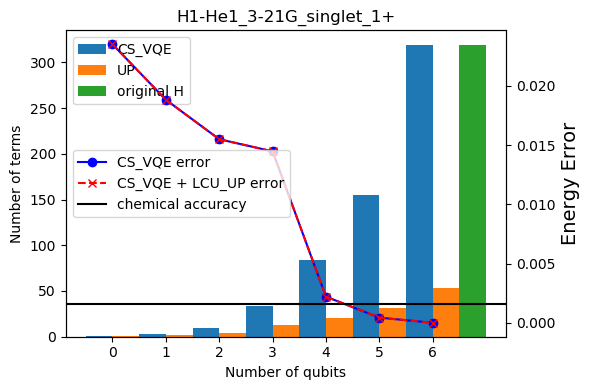

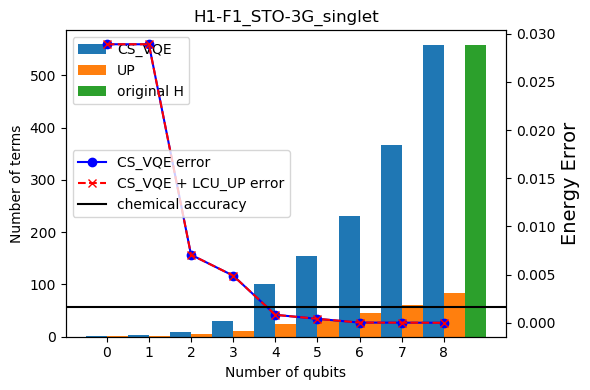

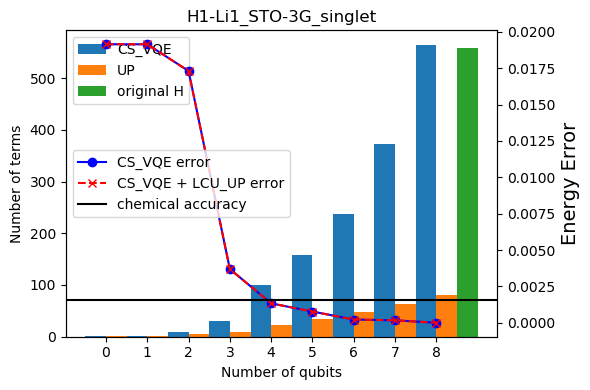

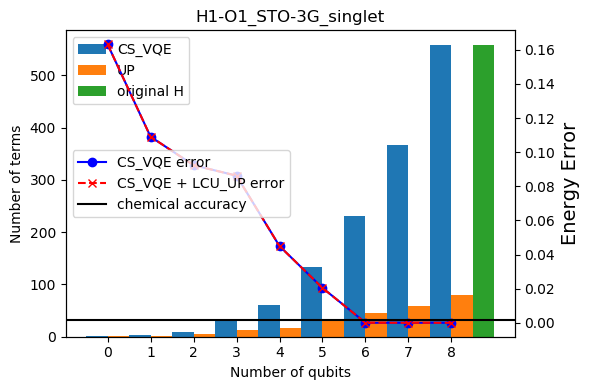

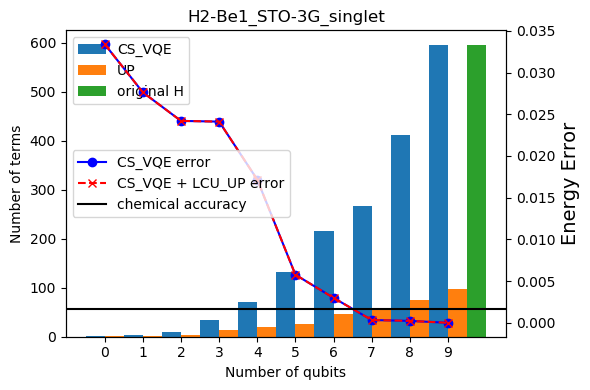

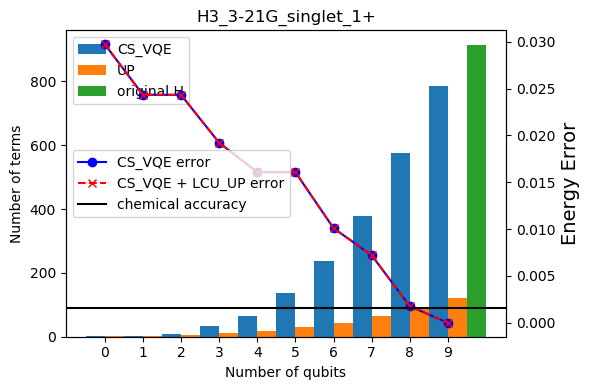

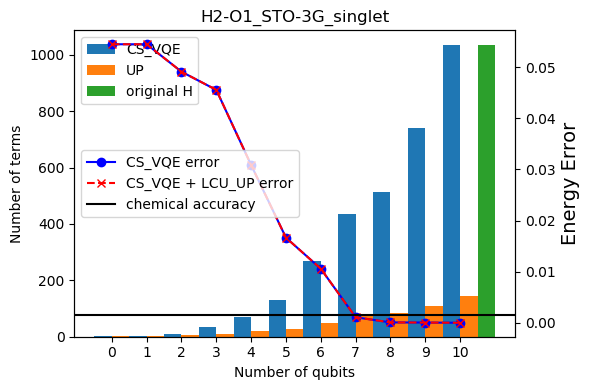

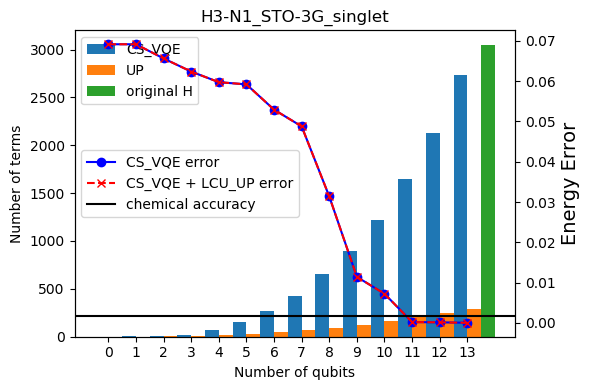

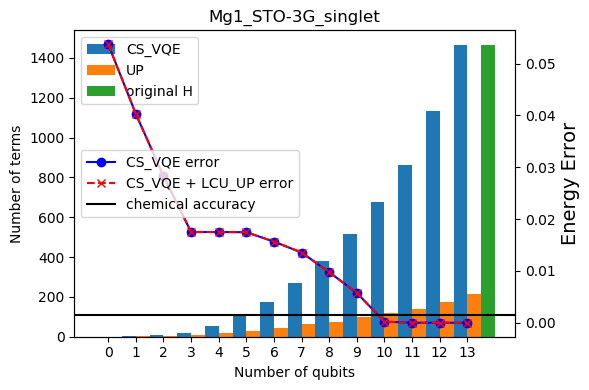

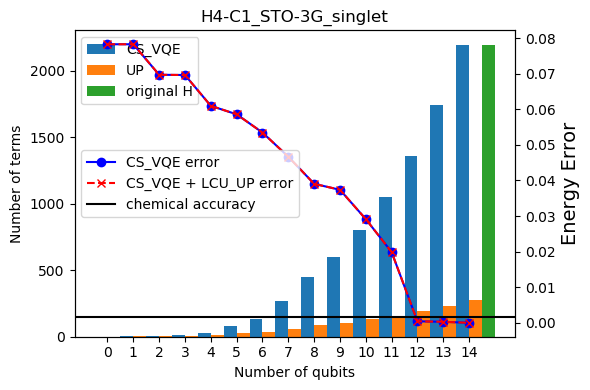

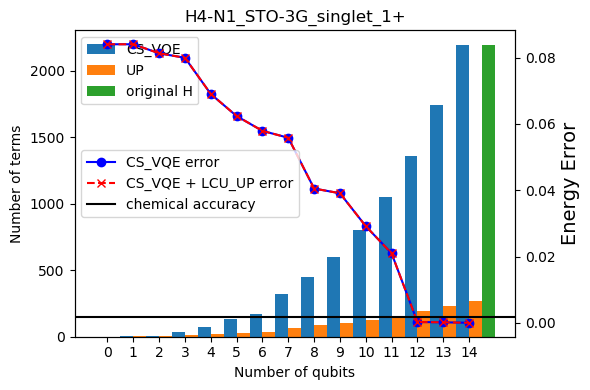

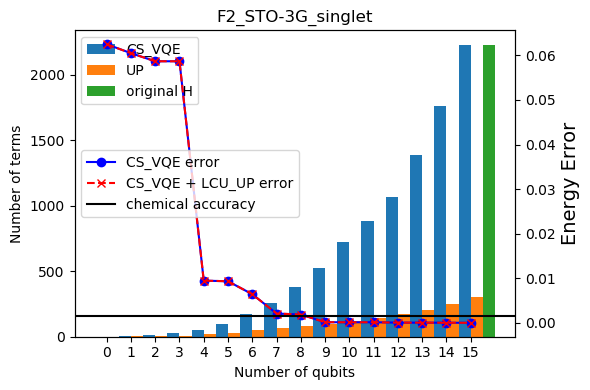

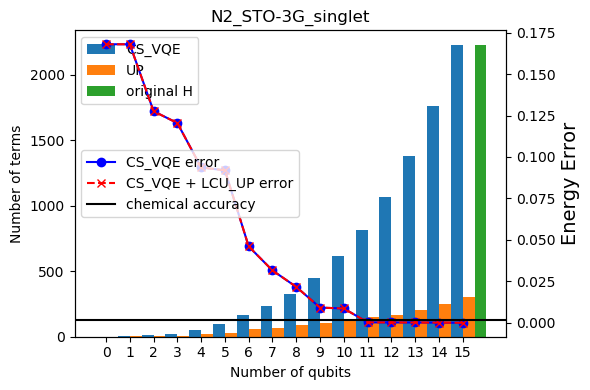

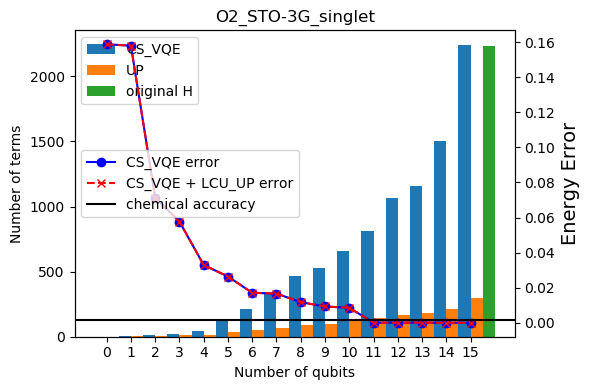

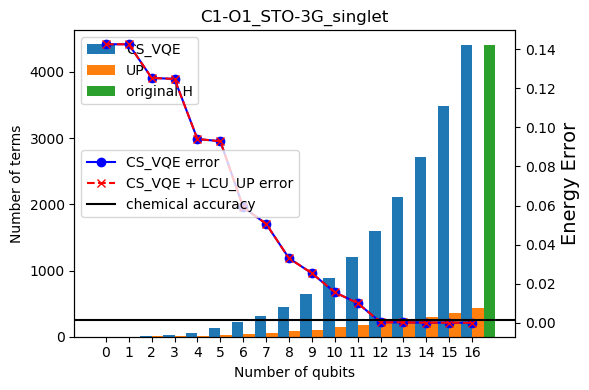

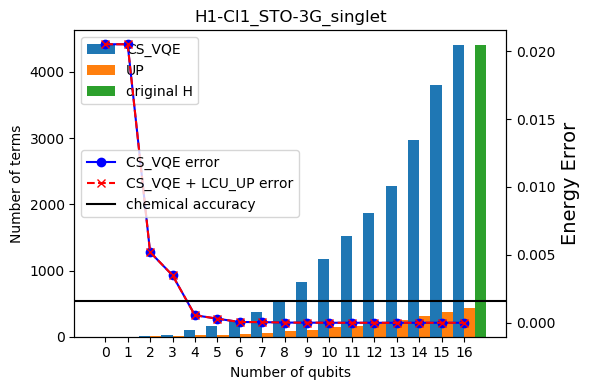

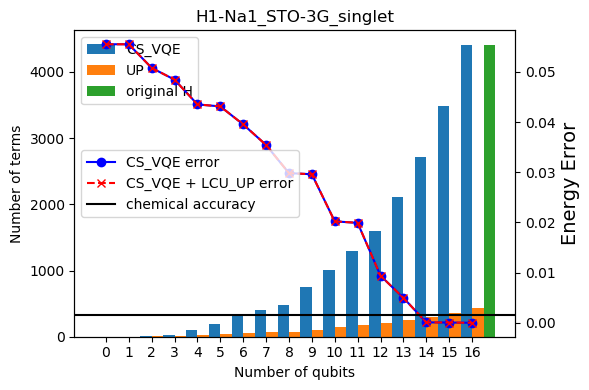

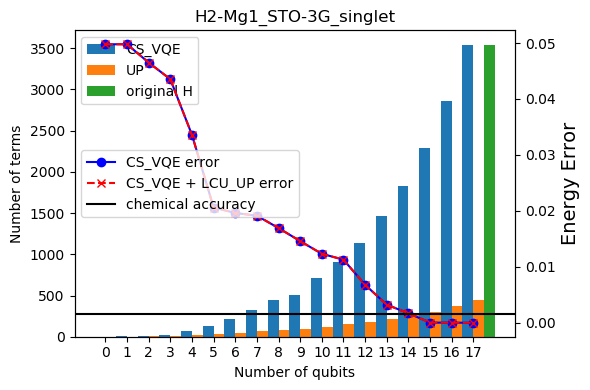

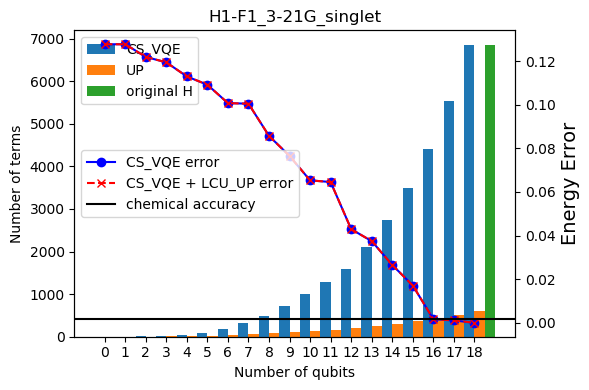

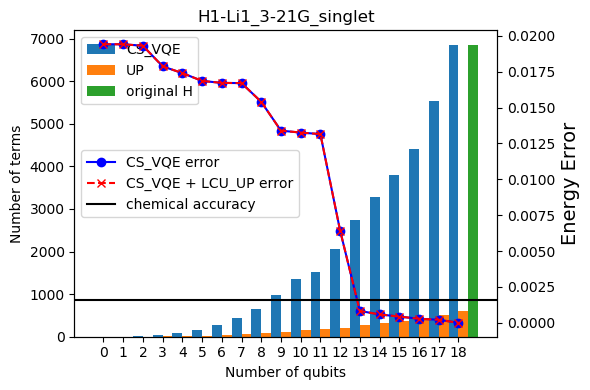

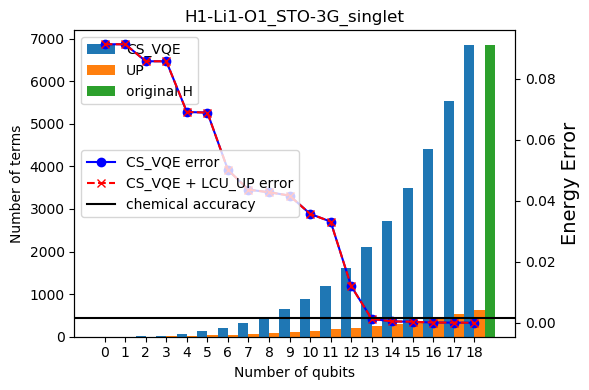

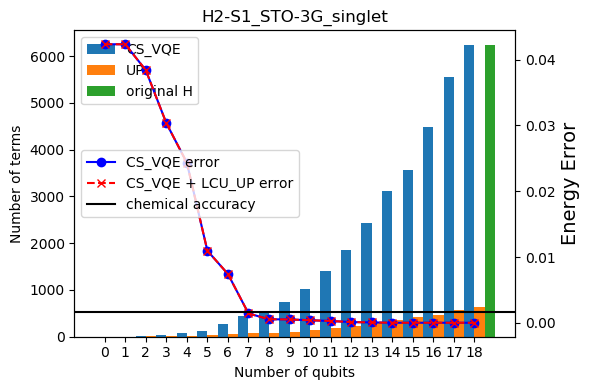

In [14]:
for molecule in loaded_dict:
    plot_n_terms_and_error(loaded_dict[molecule], csvqe_results, full_H_size, molecule, E_LCU_dict, dpi=100)

In [16]:
## import each sub Hamiltonian
file_name = 'experimental_ordering_updated_hamiltonians__2021Mar11-021339950077.pickle'

with open(file_name, 'rb') as infile:
    updated_hamiltonians = pickle.load(infile)
    



In [17]:
print('Contextual: \n')
# this is a list of Hamiltonians!
print(updated_hamiltonians['H3_STO-3G_singlet_1+']['Contextual_Hamiltonian_list'])
print('\n')

print('non-Contextual: \n')
print(updated_hamiltonians['H3_STO-3G_singlet_1+']['non_Contextual_H'])

Contextual: 

[[-2.903212918716724 []], [-2.180200253245659 [], -0.7230126654710651 [Z0], -0.13501075787517966 [X0]], [-1.438528639099044 [], -0.01919944406113084 [Z0 Z1], -0.07733163434390385 [Z0 X1], -0.07195737217001562 [X0], 0.051042862665487465 [X0 X1], 0.06305338570516404 [X0 Z1], -0.03745984341074934 [Y0 Y1], 0.07733164795674143 [X1], 0.7416716141466151 [Z1], -0.7422121095321959 [Z0]], [-1.7512307459285525 [], 0.023568152336180023 [Z0 X1], 0.00959972203056542 [Z0 Z1 Z2], 0.03866581717195192 [Z0 Z1 X2], -0.02356815233618002 [Y0 Y1], -0.027790548973821074 [X0 X1 Z2], 0.018401098184557648 [X0 X1 X2], -0.07195737217001562 [X0], -0.00959972203056542 [Z0 Z2], -0.03866581717195192 [Z0 X2], 0.02779054897382107 [X1 Z2], -0.018401098184557648 [X1 X2], -0.31270210682950855 [Z1], -0.01835456159795137 [X0 Z1 X2], 0.003730956397021274 [X0 Z1 Z2], 0.02779053932668584 [Y0 Y1 X2], 0.018401112754287855 [Y0 Y1 Z2], -0.01872992170537467 [Y0 Y2], -0.02779053932668584 [Z0 X1 X2], -0.01840111275428786

In [25]:
len(list(updated_hamiltonians['H3_STO-3G_singlet_1+']['full_H']))

34

In [19]:
updated_hamiltonians['H3_STO-3G_singlet_1+']['Contextual_Hamiltonian_list'][-1]

[-1.7512307459285525 [],
 0.023568152336180023 [Z0 X1],
 0.00959972203056542 [Z0 Z1 Z2],
 0.03866581717195192 [Z0 Z1 X2],
 -0.02356815233618002 [Y0 Y1],
 -0.027790548973821074 [X0 X1 Z2],
 0.018401098184557648 [X0 X1 X2],
 -0.07195737217001562 [X0],
 -0.00959972203056542 [Z0 Z2],
 -0.03866581717195192 [Z0 X2],
 0.02779054897382107 [X1 Z2],
 -0.018401098184557648 [X1 X2],
 -0.31270210682950855 [Z1],
 -0.01835456159795137 [X0 Z1 X2],
 0.003730956397021274 [X0 Z1 Z2],
 0.02779053932668584 [Y0 Y1 X2],
 0.018401112754287855 [Y0 Y1 Z2],
 -0.01872992170537467 [Y0 Y2],
 -0.02779053932668584 [Z0 X1 X2],
 -0.01840111275428786 [Z0 X1 Z2],
 0.05525076408582349 [X2],
 0.45242596048373357 [Z2],
 -0.023568139980123585 [Y1 Y2],
 -0.022080883870917938 [Z1 X2],
 -0.28924565366288146 [Z1 Z2],
 0.01872992170537467 [Y0 Z1 Y2],
 0.023568139980123585 [X0 Y1 Y2],
 0.03268830106753609 [X0 X2],
 0.06678434210218531 [X0 Z2],
 -0.023568139980123585 [Z0 Y1 Y2],
 -0.023568139980123585 [Y0 X1 Y2],
 0.371106054766097

# Potential mistake:

In [96]:
print(len(updated_hamiltonians['H3_STO-3G_singlet_1+']['Contextual_Hamiltonian_list'][-1]))

35


In [94]:
full_H_size['H3_STO-3G_singlet_1+']

34

[-1.7512307459285525 [],
 0.023568152336180023 [Z0 X1],
 0.00959972203056542 [Z0 Z1 Z2],
 0.03866581717195192 [Z0 Z1 X2],
 -0.02356815233618002 [Y0 Y1],
 -0.027790548973821074 [X0 X1 Z2],
 0.018401098184557648 [X0 X1 X2],
 -0.07195737217001562 [X0],
 -0.00959972203056542 [Z0 Z2],
 -0.03866581717195192 [Z0 X2],
 0.02779054897382107 [X1 Z2],
 -0.018401098184557648 [X1 X2],
 -0.31270210682950855 [Z1],
 -0.01835456159795137 [X0 Z1 X2],
 0.003730956397021274 [X0 Z1 Z2],
 0.02779053932668584 [Y0 Y1 X2],
 0.018401112754287855 [Y0 Y1 Z2],
 -0.01872992170537467 [Y0 Y2],
 -0.02779053932668584 [Z0 X1 X2],
 -0.01840111275428786 [Z0 X1 Z2],
 0.05525076408582349 [X2],
 0.45242596048373357 [Z2],
 -0.023568139980123585 [Y1 Y2],
 -0.022080883870917938 [Z1 X2],
 -0.28924565366288146 [Z1 Z2],
 0.01872992170537467 [Y0 Z1 Y2],
 0.023568139980123585 [X0 Y1 Y2],
 0.03268830106753609 [X0 X2],
 0.06678434210218531 [X0 Z2],
 -0.023568139980123585 [Z0 Y1 Y2],
 -0.023568139980123585 [Y0 X1 Y2],
 0.371106054766097

In [106]:
updated_hamiltonians['H3_STO-3G_singlet_1+']['non_Contextual_H']

-1.7512307459285525 [] +
0.03597868636603963 [X0 X1 X2] +
-0.03597868636603963 [X0 Y1 Y2] +
0.03597868636603963 [Y0 X1 Y2] +
0.03597868636603963 [Y0 Y1 X2] +
-0.45436486525596403 [Z0] +
0.37110605476609804 [Z0 Z1] +
-0.2878474382772282 [Z0 Z1 Z2] +
0.37110605476609787 [Z0 Z2] +
-0.017109477140260287 [Z1] +
0.31270210682950855 [Z1 Z2] +
-0.017109477140260287 [Z2]

In [42]:
key_list=[]
for ciPi in updated_hamiltonians['H3_STO-3G_singlet_1+']['Contextual_Hamiltonian_list'][-1]:
    ci = list(ciPi.terms.keys())[0]
    key_list.append(ci)

In [43]:
newH = Get_Operfermion_Hamiltonian(hamiltonians['H3_STO-3G_singlet_1+'][2])
key_list2=[]

for ciPi in newH:
    ci = list(ciPi.terms.keys())[0]
    key_list2.append(ci)

In [46]:
for key in key_list:
    if key not in key_list2:
        print(key)

((1, 'X'), (2, 'X'))
((0, 'Z'), (1, 'X'), (2, 'X'))


In [48]:
csvqe_results['H3_STO-3G_singlet_1+']

[-2.916018490268454,
 [-2.903212918716724,
  -2.9157104293639806,
  -2.916018490268455,
  -2.9160184902684523],
 [0.012805571551730122,
  0.0003080609044734395,
  -8.881784197001252e-16,
  1.7763568394002505e-15],
 [0, 2, 1]]